In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/ColabbNotebooks' #추후에 학습한 모델을 저장하거나 분석 결과를 파일로 구글 드라이브에 저장하기 위함

[Errno 2] No such file or directory: '/content/drive/MyDrive/ColabbNotebooks #추후에 학습한 모델을 저장하거나 분석 결과를 파일로 구글 드라이브에 저장하기 위함'
/content


In [ ]:
!pip install mxnet
!pip install gluonnlp==0.8.0
!pip install tqdm pandas
!pip install sentencepiece
!pip install transformers
!pip install torch>=1.8.1

  Using cached transformers-4.34.0-py3-none-any.whl (7.7 MB)
  Using cached huggingface_hub-0.18.0-py3-none-any.whl (301 kB)
  Using cached tokenizers-0.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.8 MB)
  Using cached safetensors-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached huggingface_hub-0.17.3-py3-none-any.whl (295 kB)


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow_addons as tfa
# import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from transformers import BertTokenizer, TFBertForSequenceClassification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, \
#                             roc_auc_score, confusion_matrix, classification_report, \
#                             matthews_corrcoef, cohen_kappa_score, log_loss

현재 KoBERT는 코랩환경에서(주피터X) huggingface로 불러와야 사용이 가능하다.

In [ ]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-y7anawye/kobert-tokenizer_e3e38f27f608452f84b9d1c9bb317a84
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-y7anawye/kobert-tokenizer_e3e38f27f608452f84b9d1c9bb317a84
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4633 sha256=a3956826ef902b3b9e35b78c9f1a008bfdcb25be31a76efe032f5d7f901732f2
  Stored in directory: /tmp/pip-ephem-wheel-cache-hbcc5q7w/wheels/e9/1a/3f/a864970e8a169c176befa3c4a1e07aa612f69195907a4045fe
Successfully built kobert_tokenizer


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from gluonnlp.vocab import BERTVocab
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: ignored

In [ ]:
from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt

# from google.colab import files

# # 파일 업로드
# uploaded = files.upload()
# # 업로드한 파일 이름 확인
# file_name = list(uploaded.keys())[0]
# # DataFrame으로 읽기
# df = pd.read_csv(file_name)
# # DataFrame 확인
# print(df.head())

In [ ]:
device = torch.device("cuda:0")
device

device(type='cuda', index=0)

In [ ]:
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')
# vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


# 통계청에서 제공한 학습용 라벨링 데이터를 통한 모델 학습

In [ ]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()
# 업로드한 파일 이름 확인
file_name = list(uploaded.keys())[0]
# DataFrame으로 읽기
df = pd.read_csv(file_name)
# DataFrame 확인
print(df.head())

Saving labelled_data.csv to labelled_data.csv
         날짜                                    제목  \
0  20180102  [신년사]손경식 CJ회장_ "해외사업 공격적 확장_ 성장 가속화"   
1  20180109     [취업과 창업]신입사원 연차 생기고 공공기관 채용 역대 최대   
2  20180109                2018년 채용연계형 인턴채용 문 열렸다   
3  20180109                    무술년 채용연계형 인턴채용 스타트   
4  20180111                그냥 쉬었다 청년_ 30만명 역대 최고치   

                                                 URL  라벨러1  라벨러2  라벨러3  라벨러4  \
0  http://news.naver.com/main/read.nhn?mode=LSD&m...     3     3     3     4   
1  http://news.naver.com/main/read.nhn?mode=LSD&m...     4     4     5     5   
2  http://news.naver.com/main/read.nhn?mode=LSD&m...     4     4     4     4   
3  http://news.naver.com/main/read.nhn?mode=LSD&m...     4     3     4     4   
4  http://news.naver.com/main/read.nhn?mode=LSD&m...     2     2     1     1   

   라벨러5  라벨러6  Folder_Name  
0     3     3         2018  
1     5     4         2018  
2     5     4         2018  
3     5     4         2018  
4     1  

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/labelled_data.csv')
data

,날짜,제목,URL,라벨러1,라벨러2,라벨러3,라벨러4,라벨러5,라벨러6,Folder_Name
0,20180102,"[신년사]손경식 CJ회장_ ""해외사업 공격적 확장_ 성장 가속화""",http://news.naver.com/main/read.nhn?mode=LSD&m...,3,3,3,4,3,3,2018
1,20180109,[취업과 창업]신입사원 연차 생기고 공공기관 채용 역대 최대,http://news.naver.com/main/read.nhn?mode=LSD&m...,4,4,5,5,5,4,2018
2,20180109,2018년 채용연계형 인턴채용 문 열렸다,http://news.naver.com/main/read.nhn?mode=LSD&m...,4,4,4,4,5,4,2018
3,20180109,무술년 채용연계형 인턴채용 스타트,http://news.naver.com/main/read.nhn?mode=LSD&m...,4,3,4,4,5,4,2018
4,20180111,그냥 쉬었다 청년_ 30만명 역대 최고치,http://news.naver.com/main/read.nhn?mode=LSD&m...,2,2,1,1,1,1,2018
...,...,...,...,...,...,...,...,...,...,...
7613,20200831,코로나 충격에 따른 근로 시간 감소_ 과거 위기의 5배,https://news.naver.com/main/read.nhn?mode=LSD&...,2,2,2,2,2,2,2020
7614,20200831,7월 사업체종사자 13만8천명 감소 코로나19 여파에 5개월째 감소,https://news.naver.com/main/read.nhn?mode=LSD&...,4,4,1,2,2,2,2020
7615,20200826,한치 앞도 안보인다..채용문 꽁꽁 닫는 카드사,https://news.naver.com/main/read.nhn?mode=LSD&...,2,2,1,2,2,3,2020
7616,20200831,토스_ 고객 상담직 신입 및 경력 30명 공개 채용,https://news.naver.com/main/read.nhn?mode=LSD&...,4,4,4,4,2,3,2020


In [ ]:
def calculate_average_scores(input_file):
    df = pd.read_csv(input_file)
    df['평균 점수'] = df[['라벨러1', '라벨러2', '라벨러3', '라벨러4', '라벨러5', '라벨러6']].mean(axis=1)
    df['평균 점수'] = df['평균 점수'].round().astype(int)

    # 값 치환을 수행합니다.
    df.loc[df['평균 점수'] == 1, '평균 점수'] = 0
    df.loc[df['평균 점수'] == 2, '평균 점수'] = 1
    df.loc[df['평균 점수'] == 3, '평균 점수'] = 2
    df.loc[df['평균 점수'] == 4, '평균 점수'] = 3
    df.loc[df['평균 점수'] == 5, '평균 점수'] = 4

    # 'Folder_Name' 컬럼을 제거합니다.
    df.drop(['Folder_Name'], axis=1, inplace=True)

    return df

input_file = '/content/drive/MyDrive/Colab Notebooks/labelled_data.csv'  # 입력 CSV 파일 이름

data = calculate_average_scores(input_file)

data

,날짜,제목,URL,라벨러1,라벨러2,라벨러3,라벨러4,라벨러5,라벨러6,평균 점수
0,20180102,"[신년사]손경식 CJ회장_ ""해외사업 공격적 확장_ 성장 가속화""",http://news.naver.com/main/read.nhn?mode=LSD&m...,3,3,3,4,3,3,2
1,20180109,[취업과 창업]신입사원 연차 생기고 공공기관 채용 역대 최대,http://news.naver.com/main/read.nhn?mode=LSD&m...,4,4,5,5,5,4,3
2,20180109,2018년 채용연계형 인턴채용 문 열렸다,http://news.naver.com/main/read.nhn?mode=LSD&m...,4,4,4,4,5,4,3
3,20180109,무술년 채용연계형 인턴채용 스타트,http://news.naver.com/main/read.nhn?mode=LSD&m...,4,3,4,4,5,4,3
4,20180111,그냥 쉬었다 청년_ 30만명 역대 최고치,http://news.naver.com/main/read.nhn?mode=LSD&m...,2,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
7613,20200831,코로나 충격에 따른 근로 시간 감소_ 과거 위기의 5배,https://news.naver.com/main/read.nhn?mode=LSD&...,2,2,2,2,2,2,1
7614,20200831,7월 사업체종사자 13만8천명 감소 코로나19 여파에 5개월째 감소,https://news.naver.com/main/read.nhn?mode=LSD&...,4,4,1,2,2,2,1
7615,20200826,한치 앞도 안보인다..채용문 꽁꽁 닫는 카드사,https://news.naver.com/main/read.nhn?mode=LSD&...,2,2,1,2,2,3,1
7616,20200831,토스_ 고객 상담직 신입 및 경력 30명 공개 채용,https://news.naver.com/main/read.nhn?mode=LSD&...,4,4,4,4,2,3,3


In [ ]:
# # 라벨러가 여러명이므로 이를 하나로 평균을 내주어야 함
# def calculate_average_scores(input_file):
#     df = pd.read_csv(input_file)
#     df['평균 점수'] = df[['라벨러1', '라벨러2', '라벨러3', '라벨러4', '라벨러5', '라벨러6']].mean(axis=1)
#     df['평균 점수'] = df['평균 점수'].round().astype(int)
#     return df

# input_file = '/content/drive/MyDrive/Colab Notebooks/labelled_data.csv'  # 입력 CSV 파일 이름

# data = calculate_average_scores(input_file)

# # 값 치환을 수행합니다.
# data.loc[data['평균 점수'] == 1, '평균 점수'] = 0
# data.loc[data['평균 점수'] == 2, '평균 점수'] = 1
# data.loc[data['평균 점수'] == 3, '평균 점수'] = 2
# data.loc[data['평균 점수'] == 4, '평균 점수'] = 3
# data.loc[data['평균 점수'] == 5, '평균 점수'] = 4
# # 평균 점수가 계산된 DataFrame 출력
# data

In [ ]:
data_list = []

for title, label in zip(data['제목'], data['평균 점수']):
  data = []
  data.append(title)
  data.append(str(label))

  data_list.append(data)

len(data_list)

7618

In [ ]:
data_list[:5]

[['[신년사]손경식 CJ회장_ "해외사업 공격적 확장_ 성장 가속화"', '2'],
 ['[취업과 창업]신입사원 연차 생기고 공공기관 채용 역대 최대', '3'],
 ['2018년 채용연계형 인턴채용 문 열렸다', '3'],
 ['무술년 채용연계형 인턴채용 스타트', '3'],
 ['그냥 쉬었다 청년_ 30만명 역대 최고치', '0']]

## 데이터 분포 확인

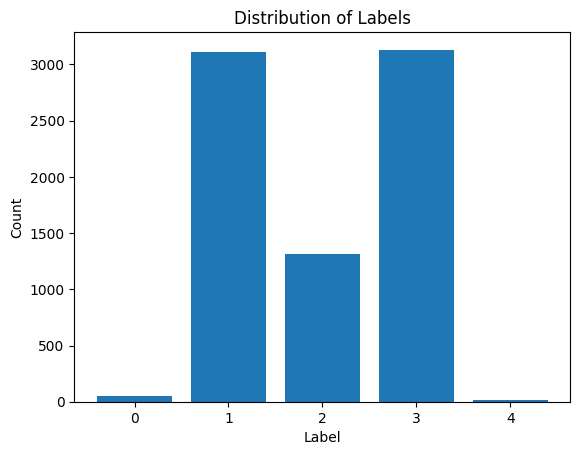

0점: 49개
1점: 3110개
2점: 1314개
3점: 3131개
4점: 14개


In [ ]:
import matplotlib.pyplot as plt

#각 라벨의 개수 계산
counts = [sum(1 for item in data_list if item[1] == label) for label in ['0', '1', '2', '3', '4']]

#막대 그래프 생성
labels = ['0', '1', '2', '3', '4']
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

# 각 라벨의 개수 출력
for label, count in zip(labels, counts):
  print(f'{label}점: {count}개')

# 학습 데이터 분리 (4:1)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_list, test_size = 0.2, shuffle=True, random_state = 0)

print(len(train))
print(len(test))

6094
1524


# 파라미터 세팅

In [ ]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 10
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
class BERTSentenceTransform:
    r"""BERT style data transformation.

    Parameters
    ----------
    tokenizer : BERTTokenizer.
        Tokenizer for the sentences.
    max_seq_length : int.
        Maximum sequence length of the sentences.
    pad : bool, default True
        Whether to pad the sentences to maximum length.
    pair : bool, default True
        Whether to transform sentences or sentence pairs.
    """

    def __init__(self, tokenizer, max_seq_length,vocab, pad=True, pair=True):
        self._tokenizer = tokenizer
        self._max_seq_length = max_seq_length
        self._pad = pad
        self._pair = pair
        self._vocab = vocab

    def __call__(self, line):
        """Perform transformation for sequence pairs or single sequences.

        The transformation is processed in the following steps:
        - tokenize the input sequences
        - insert [CLS], [SEP] as necessary
        - generate type ids to indicate whether a token belongs to the first
        sequence or the second sequence.
        - generate valid length

        For sequence pairs, the input is a tuple of 2 strings:
        text_a, text_b.

        Inputs:
            text_a: 'is this jacksonville ?'
            text_b: 'no it is not'
        Tokenization:
            text_a: 'is this jack ##son ##ville ?'
            text_b: 'no it is not .'
        Processed:
            tokens: '[CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]'
            type_ids: 0     0  0    0    0     0       0 0     1  1  1  1   1 1
            valid_length: 14

        For single sequences, the input is a tuple of single string:
        text_a.

        Inputs:
            text_a: 'the dog is hairy .'
        Tokenization:
            text_a: 'the dog is hairy .'
        Processed:
            text_a: '[CLS] the dog is hairy . [SEP]'
            type_ids: 0     0   0   0  0     0 0
            valid_length: 7

        Parameters
        ----------
        line: tuple of str
            Input strings. For sequence pairs, the input is a tuple of 2 strings:
            (text_a, text_b). For single sequences, the input is a tuple of single
            string: (text_a,).

        Returns
        -------
        np.array: input token ids in 'int32', shape (batch_size, seq_length)
        np.array: valid length in 'int32', shape (batch_size,)
        np.array: input token type ids in 'int32', shape (batch_size, seq_length)

        """

        # convert to unicode
        text_a = line[0]
        if self._pair:
            assert len(line) == 2
            text_b = line[1]

        tokens_a = self._tokenizer.tokenize(text_a)
        tokens_b = None

        if self._pair:
            tokens_b = self._tokenizer(text_b)

        if tokens_b:
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            self._truncate_seq_pair(tokens_a, tokens_b,
                                    self._max_seq_length - 3)
        else:
            # Account for [CLS] and [SEP] with "- 2"
            if len(tokens_a) > self._max_seq_length - 2:
                tokens_a = tokens_a[0:(self._max_seq_length - 2)]

        # The embedding vectors for `type=0` and `type=1` were learned during
        # pre-training and are added to the wordpiece embedding vector
        # (and position vector). This is not *strictly* necessary since
        # the [SEP] token unambiguously separates the sequences, but it makes
        # it easier for the model to learn the concept of sequences.

        # For classification tasks, the first vector (corresponding to [CLS]) is
        # used as as the "sentence vector". Note that this only makes sense because
        # the entire model is fine-tuned.
        #vocab = self._tokenizer.vocab
        vocab = self._vocab
        tokens = []
        tokens.append(vocab.cls_token)
        tokens.extend(tokens_a)
        tokens.append(vocab.sep_token)
        segment_ids = [0] * len(tokens)

        if tokens_b:
            tokens.extend(tokens_b)
            tokens.append(vocab.sep_token)
            segment_ids.extend([1] * (len(tokens) - len(segment_ids)))

        input_ids = self._tokenizer.convert_tokens_to_ids(tokens)

        # The valid length of sentences. Only real  tokens are attended to.
        valid_length = len(input_ids)

        if self._pad:
            # Zero-pad up to the sequence length.
            padding_length = self._max_seq_length - valid_length
            # use padding tokens for the rest
            input_ids.extend([vocab[vocab.padding_token]] * padding_length)
            segment_ids.extend([0] * padding_length)

        return np.array(input_ids, dtype='int32'), np.array(valid_length, dtype='int32'),\
            np.array(segment_ids, dtype='int32')


In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        #transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
data_train = BERTDataset(train, 0, 1, tokenizer, vocab, max_len, True, False)
data_test = BERTDataset(test, 0, 1, tokenizer, vocab, max_len, True, False)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

In [ ]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [ ]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
train_dataloader

# 모델 학습

In [ ]:
train_history = []
test_history = []
loss_history = []

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        # print(label.shape, out.shape)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
            train_history.append(train_acc / (batch_id+1))
            loss_history.append(loss.data.cpu().numpy())
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    # train_history.append(train_acc / (batch_id+1))
    model.eval() # 모델을 평가 모드로 설정
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids) # 모델에 입력 데이터 전달하여 출력 얻기
        test_acc += calc_accuracy(out, label) # 정확도 계산하여 누적
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
    test_history.append(test_acc / (batch_id+1)) # 테스트 정확도의 추이를 기록하고 후에 시각화하거나 분석하는 데 사용


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 0.18942086398601532 train acc 0.953125
epoch 1 train acc 0.9876302083333334


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 1 test acc 0.8104967948717948


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.18925830721855164 train acc 0.921875
epoch 2 train acc 0.984375


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 2 test acc 0.809344951923077


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.2398556023836136 train acc 0.9375
epoch 3 train acc 0.98681640625


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 3 test acc 0.8137520032051282


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.17209093272686005 train acc 0.9375
epoch 4 train acc 0.98583984375


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 4 test acc 0.8068910256410257


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.25905001163482666 train acc 0.90625
epoch 5 train acc 0.9845377604166666


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 5 test acc 0.8067407852564102


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.2653545141220093 train acc 0.9375
epoch 6 train acc 0.9839564732142857


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 6 test acc 0.7858072916666666


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.3085881769657135 train acc 0.90625
epoch 7 train acc 0.9700520833333334


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 7 test acc 0.7887119391025642


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.17743553221225739 train acc 0.921875
epoch 8 train acc 0.9690755208333334


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 8 test acc 0.8059395032051282


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.1839299201965332 train acc 0.96875
epoch 9 train acc 0.9705403645833334


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 9 test acc 0.7953725961538461


  0%|          | 0/96 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.13106364011764526 train acc 0.96875
epoch 10 train acc 0.9641927083333334


  0%|          | 0/24 [00:00<?, ?it/s]

epoch 10 test acc 0.8080428685897436


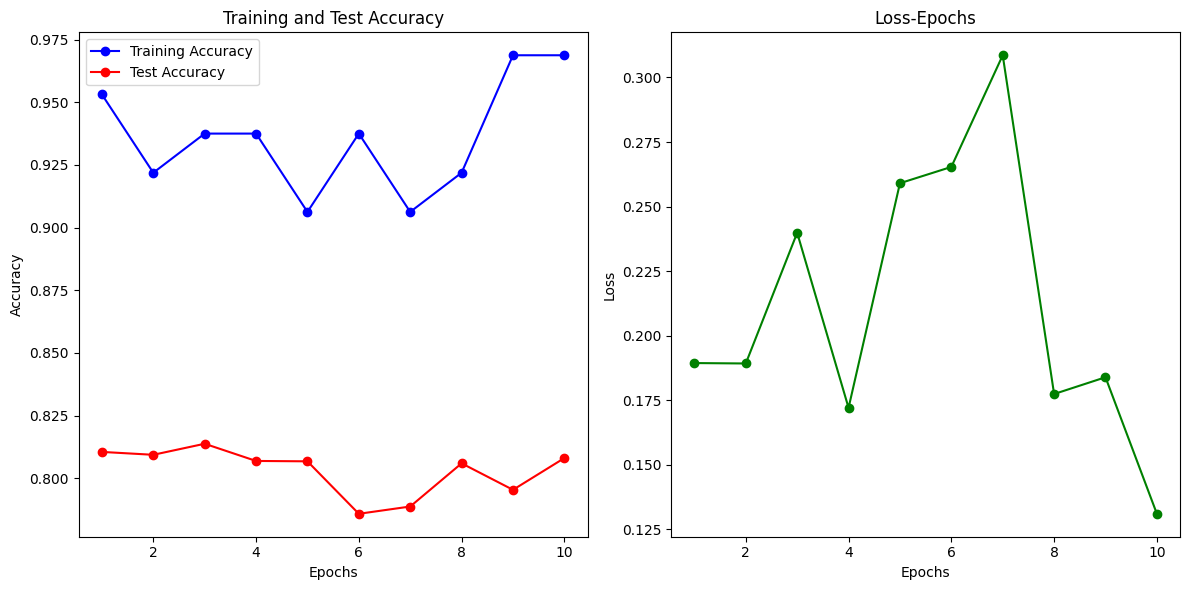

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# training and test accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_history, 'bo-', label='Training Accuracy')
plt.plot(epochs, test_history, 'ro-', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# training loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_history, 'go-')
plt.title('Loss-Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# 모델 저장

In [ ]:
# 모델을 드라이브 경로에 저장
PATH = '/content/drive/My Drive/'
model_name = 'koBERT01.pt'  # 모델 파일 이름
torch.save(model.state_dict(), PATH + model_name)

tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower = False)

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/koBERT01.pt"))

<All keys matched successfully>

In [ ]:
category = {'강한 부정': 0, '부정': 1, '중립': 2, '긍정': 3, '강한 긍정': 4}

In [ ]:
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/koBERT01.pt'))
model.eval()

# 예측 실행
out = model(token_ids, valid_length, segment_ids)

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        #transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

# 예측

In [ ]:
# 예측하려는 문장
predict_sentence = '최저임금 1만원 무산됐지만…재계 "동결했어야…고용축소 우려""'

# BERTDataset 클래스의 인스턴스 생성
data = [predict_sentence, '0']
dataset_another = [data]
another_test = BERTDataset(dataset_another, 0, 1, tokenizer, vocab, max_len, True, False)

# DataLoader 클래스의 인스턴스 생성
test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)

# 예측 실행
model.eval()
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
    token_ids = token_ids.long().to(device)
    segment_ids = segment_ids.long().to(device)
    valid_length= valid_length
    label = label.long().to(device)
    out = model(token_ids, valid_length, segment_ids)

In [ ]:
out

tensor([[-2.6534,  4.3464,  1.8594, -0.5324, -4.2521]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [ ]:
# 가장 높은 점수의 인덱스 계산
predicted_index = out.argmax()

# 예측 결과 출력
print(f'Predicted class: {predicted_index + 1}')

Predicted class: 2


In [ ]:
# category = {'강한 부정': 0, '부정': 1, '중립': 2, '긍정': 3, '강한 긍정': 4}

# 빅카인즈

In [ ]:
import os
import torch
# 토크나이저 관련 경고 무시
# 문제가 발생할 경우 false로 설정
os.environ["TOKENIZERS_PARALLELISM"] = 'true'
## GPU
device = torch.device("cuda:0")

In [ ]:
# model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/koBERT01.pt'))
model.eval()

# 예측 실행
# out = model(token_ids, valid_length, segment_ids)

NameError: ignored

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len,vocab=vocab, pad=pad, pair=pair)
        #transform = nlp.data.BERTSentenceTransform(
        #    tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
# import pandas as pd

# csv_file_path = '/content/drive/MyDrive/Colab Notebooks/newsdata.csv'

# max_len = 200   #max_len값은 나중에 다시 설정 고민
# batch_size = 32  #batch_size값 고민해봐야 함

# # csv파일을 불러와서 예측해주는 함수
# def predict_sentiment(sentence):
#     data = [sentence, '0']  # Assuming '0' is the default label for sentiment
#     dataset = [data]
#     test_data = BERTDataset(dataset, 0, 1, tokenizer, vocab, max_len, True, False)

#     test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=5)

#     model.eval()
#     for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
#         token_ids = token_ids.long().to(device)
#         segment_ids = segment_ids.long().to(device)
#         valid_length = valid_length
#         label = label.long().to(device)
#         out = model(token_ids, valid_length, segment_ids)

#         predicted_index = out.argmax() + 1

#     return predicted_index.item()

# # CSV 불러오기
# df = pd.read_csv(csv_file_path, nrows=10)  # 10개만 실험

# #'predicted' column 생성
# df['predicted'] = df['제목'].apply(predict_sentiment)

# print(df[['제목', 'predicted']])

                                                  제목  predicted
0                           2018 신년사 류영진 식품의약품안전처장전문          3
1                   기쁨도 아쉬움도 아듀 2017 보통사람들이 꼽은 올해 순간          2
2                 연간근로 2000시간중 노후 준비 부실 고생 끝에 낙이 온다고          2
3                            사회 첫 발 디딘 보험부터 가입하고 가즈아          3
4                 책 속으로 은퇴 크레바스 피하는 첫 걸음 30년 가계부를 써라          3
5                          복잡한 인체의 103개 치료혈 일상에서 활용법          3
6                   독일 헌법재판소 96세 나치 조력자에 징역 4년 실형 확정          4
7                          대전과학기술대 전국 금연서포터즈 대회 최우수상          4
8  2017 헤경 베스트브랜드 금융 서비스  db손해보험 프로미라이프 참좋은 행복플러스...          4
9                      즐겁고 아름다운 노년 위해 읽고 읽고 평생 공부 하라          3


In [ ]:
# import pandas as pd

# csv_file_path = '/content/drive/MyDrive/Colab Notebooks/newsdata.csv'

# max_seq_length=max_len
# batch_size = batch_size

# # csv파일을 불러와서 예측해주는 함수
# def predict_sentiment(sentence):
#     data = [sentence, '0']  # Assuming '0' is the default label for sentiment
#     dataset = [data]
#     test_data = BERTDataset(dataset, 0, 1, tokenizer, vocab, max_len, True, False)

#     test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=5)

#     model.eval()
#     for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
#         token_ids = token_ids.long().to(device)
#         segment_ids = segment_ids.long().to(device)
#         valid_length = valid_length
#         label = label.long().to(device)
#         out = model(token_ids, valid_length, segment_ids)

#         predicted_index = out.argmax() + 1

#     return predicted_index.item()

# # csv파일 불러오기
# df = pd.read_csv(csv_file_path, nrows=1000)  # nrows=원하는만큼

# # 'predicted' column 생성
# df['predicted'] = df['제목'].apply(predict_sentiment)

# print(df[['제목', 'predicted']])

                                                  제목  predicted
0                           2018 신년사 류영진 식품의약품안전처장전문          3
1                   기쁨도 아쉬움도 아듀 2017 보통사람들이 꼽은 올해 순간          2
2                 연간근로 2000시간중 노후 준비 부실 고생 끝에 낙이 온다고          2
3                            사회 첫 발 디딘 보험부터 가입하고 가즈아          3
4                 책 속으로 은퇴 크레바스 피하는 첫 걸음 30년 가계부를 써라          3
5                          복잡한 인체의 103개 치료혈 일상에서 활용법          3
6                   독일 헌법재판소 96세 나치 조력자에 징역 4년 실형 확정          4
7                          대전과학기술대 전국 금연서포터즈 대회 최우수상          4
8  2017 헤경 베스트브랜드 금융 서비스  db손해보험 프로미라이프 참좋은 행복플러스...          4
9                      즐겁고 아름다운 노년 위해 읽고 읽고 평생 공부 하라          3


In [ ]:
# import pandas as pd

# csv_file_path = '/content/drive/MyDrive/Colab Notebooks/newsdata.csv'

# max_seq_length = max_len
# batch_size = batch_size

# # 맵핑 딕셔너리 정의
# sentiment_mapping = {0: '강한 부정', 1: '부정', 2: '중립', 3: '긍정', 4: '강한 긍정'}

# # csv파일을 불러와서 예측해주는 함수
# def predict_sentiment(sentence):
#     data = [sentence, '0']
#     dataset = [data]
#     test_data = BERTDataset(dataset, 0, 1, tokenizer, vocab, max_len, True, False)
#     test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=5)

#     model.eval()
#     for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
#         token_ids = token_ids.long().to(device)
#         segment_ids = segment_ids.long().to(device)
#         valid_length = valid_length
#         label = label.long().to(device)
#         out = model(token_ids, valid_length, segment_ids)
#         predicted_index = out.argmax() + 1

#     return predicted_index.item()

# # CSV 불러오기
# df = pd.read_csv(csv_file_path, nrows=10)

# # 'predicted' column 생성
# df['predicted'] = df['제목'].apply(predict_sentiment)

# # 맵핑 딕셔너리를 불러와 값 할당해주기, 'sentiment' column 생성
# df['sentiment'] = df['predicted'].map(sentiment_mapping)

# print(df[['제목', 'predicted', 'sentiment']])

                                                  제목  predicted sentiment
0                           2018 신년사 류영진 식품의약품안전처장전문          3        긍정
1                   기쁨도 아쉬움도 아듀 2017 보통사람들이 꼽은 올해 순간          2        중립
2                 연간근로 2000시간중 노후 준비 부실 고생 끝에 낙이 온다고          2        중립
3                            사회 첫 발 디딘 보험부터 가입하고 가즈아          3        긍정
4                 책 속으로 은퇴 크레바스 피하는 첫 걸음 30년 가계부를 써라          3        긍정
5                          복잡한 인체의 103개 치료혈 일상에서 활용법          3        긍정
6                   독일 헌법재판소 96세 나치 조력자에 징역 4년 실형 확정          4     강한 긍정
7                          대전과학기술대 전국 금연서포터즈 대회 최우수상          4     강한 긍정
8  2017 헤경 베스트브랜드 금융 서비스  db손해보험 프로미라이프 참좋은 행복플러스...          4     강한 긍정
9                      즐겁고 아름다운 노년 위해 읽고 읽고 평생 공부 하라          3        긍정


In [ ]:
import pandas as pd
import time
from tqdm import tqdm

csv_file_path = '/content/drive/MyDrive/Colab Notebooks/newsdata.csv'

max_seq_length = max_len  # 이부분 에러 가능성
batch_size = batch_size

# 맵핑 딕셔너리 정의
sentiment_mapping = {0: '강한 부정', 1: '부정', 2: '중립', 3: '긍정', 4: '강한 긍정'}

# csv파일을 불러와서 예측해주는 함수
# 최종
def predict_sentiment(sentence):
    data = [sentence, '0']
    dataset = [data]
    test_data = BERTDataset(dataset, 0, 1, tokenizer, vocab, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=5)

    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        predicted_index = out.argmax() + 1

    return predicted_index.item()

# CSV 불러오기
df = pd.read_csv(csv_file_path, nrows=1000)

# Initialize tqdm to visualize progress
tqdm.pandas()

start_time = time.time()
# 'predicted' column 생성
df['predicted'] = df['제목'].progress_apply(predict_sentiment)
end_time = time.time()

# 맵핑 딕셔너리를 불러와 값 할당해주기, 'sentiment' column 생성
df['sentiment'] = df['predicted'].map(sentiment_mapping)

print(df[['제목', 'predicted', 'sentiment']])

# Display the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")


100%|██████████| 1000/1000 [06:07<00:00,  2.72it/s]

                                     제목  predicted sentiment
0              2018 신년사 류영진 식품의약품안전처장전문          3        긍정
1      기쁨도 아쉬움도 아듀 2017 보통사람들이 꼽은 올해 순간          2        중립
2    연간근로 2000시간중 노후 준비 부실 고생 끝에 낙이 온다고          2        중립
3               사회 첫 발 디딘 보험부터 가입하고 가즈아          3        긍정
4    책 속으로 은퇴 크레바스 피하는 첫 걸음 30년 가계부를 써라          3        긍정
..                                  ...        ...       ...
995               부산대 거점국립대 공동 대입전형 설명회          4     강한 긍정
996            캠코 중 장년층 구직자 대상 행복잡 취업특강          4     강한 긍정
997         캠코와 부산 남구청 행복잡job이 취업 특강 개최          4     강한 긍정
998         지역거점 9개 국립대학 공동 대입전형 설명회 개최          4     강한 긍정
999             노인 절반만 연금 수령 평균 52만원 불과          2        중립

[1000 rows x 3 columns]
Execution time: 367.24733328819275 seconds


In [ ]:
# CSV 파일로 저장
output_csv_path = '/content/drive/MyDrive/Colab Notebooks/newsdata_with_sentiment1000.csv'
df.to_csv(output_csv_path, index=False, encoding='utf-8-sig')

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

NameError: ignored

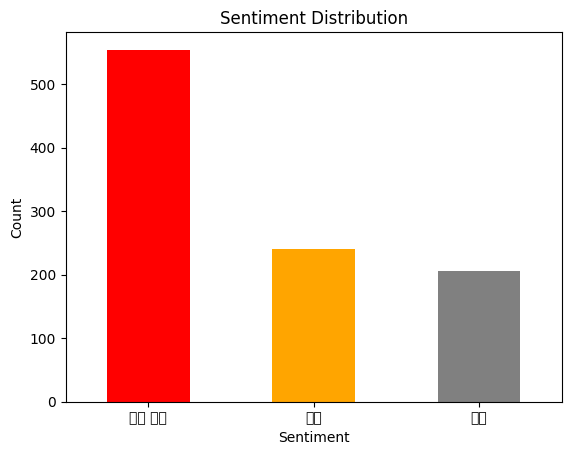

In [ ]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', rot=0, color=['red', 'orange', 'gray', 'lightblue', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()